# Demonstration: Polynomial fits

First we have our standard header with common import statements, and a statement to make plots look nice.

In [40]:
# standard import statements 2023
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import classlib4334

# jupyter-specific display instructions
%config InlineBackend.figure_format = 'retina'

# my personal defaults
mpl.rcParams['figure.figsize'] = (5.5, 3.5)
mpl.rcParams['font.size'] = 10
mpl.rcParams['lines.linewidth'] = 3

The demonstration is all about polynomial models, so let's define a bunch of them.

In [21]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

## Example 1

We start by loading some data and plotting it (this is always a good first step, though not something you would include in a report).

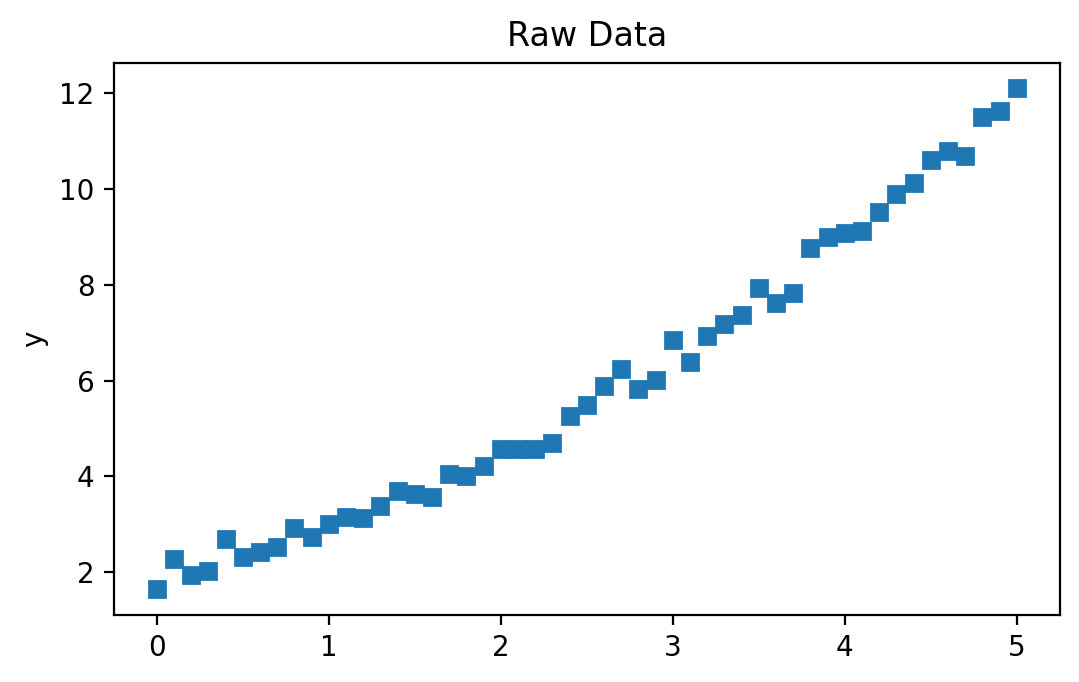

In [38]:
excel_file = 'data/demo-polynomial-1.xlsx'
mydata = pd.read_excel(excel_file)
x1 = np.array(mydata['x'])
y1 = np.array(mydata['y'])

fig, ax = plt.subplots()
ax.plot(x1, y1, 's')
ax.set_label('x')
ax.set_ylabel('y')
ax.set_title('Raw Data')
fig.tight_layout()
plt.show()

Now we are going to fit the data to a polynomial.  Let's start with a line.

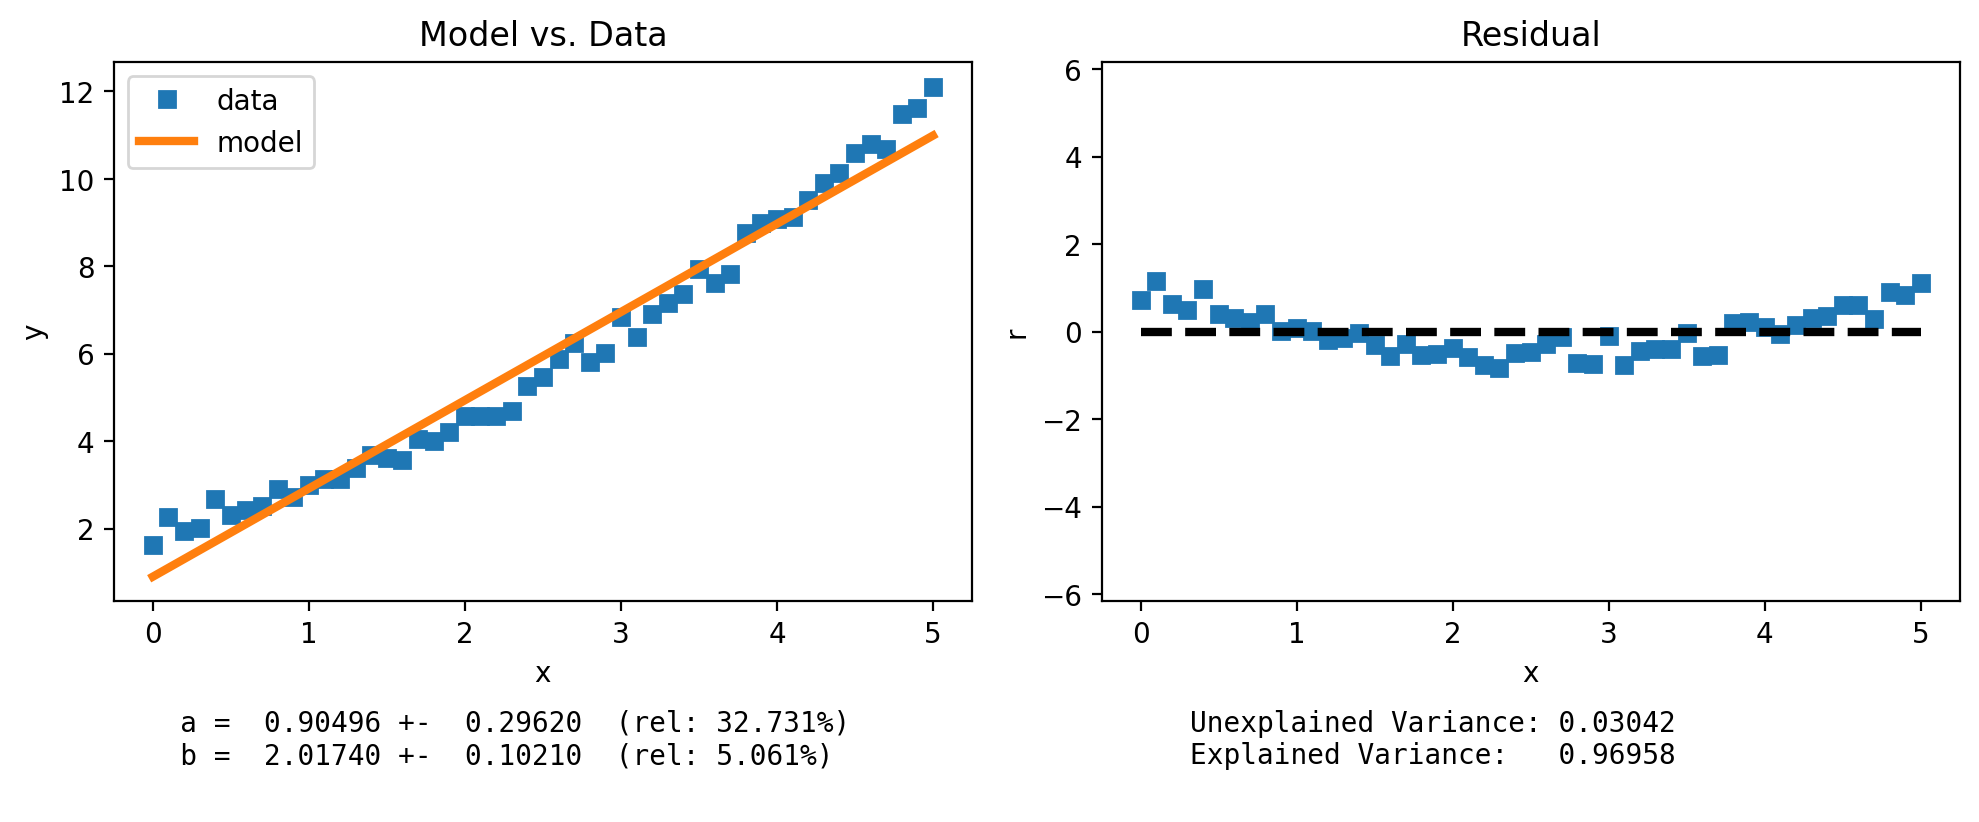

In [29]:
pfit, perr = classlib4334.fit_and_plot(p1, x1, y1, residual=True)

Okay, that isn't great -- Although the value of $R^2$ looks high, the residual has relative magnitude of up to about 12%, and clearly has coherent structure.  So let's try a quadratic.

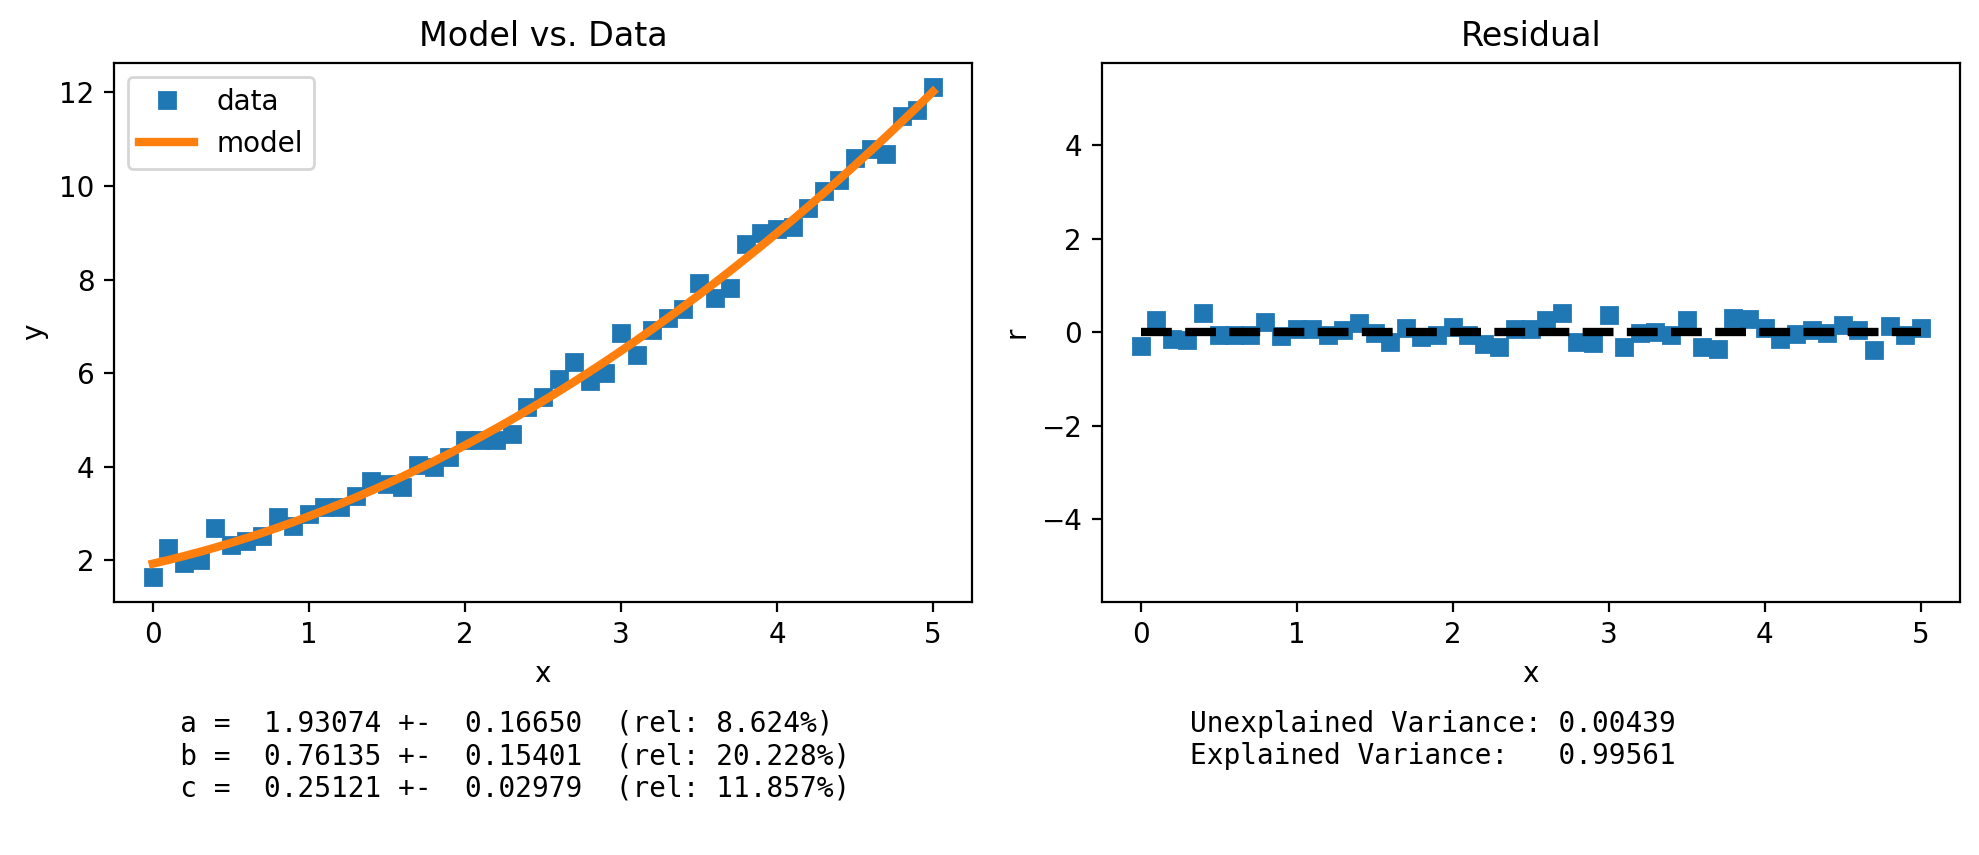

In [28]:
pfit, perr = classlib4334.fit_and_plot(p2, x1, y1, residual=True)

And this looks pretty good!  The residual magnitude has decreased a bit, to around 6%, but most importantly, there is no longer any obvious coherence in the residual.  Based on what we have learned so far, I would probably stop here.  Let's just report our final model as:

$$ y = A + Bx + Cx^2 $$
where
$$ A = 1.93 \pm 0.17 $$
$$ B = 0.76 \pm 0.15 $$
$$ C = 0.25 \pm 0.030 $$
at the 95% confidence level.

## Example 2

We start by loading some data and plotting it.

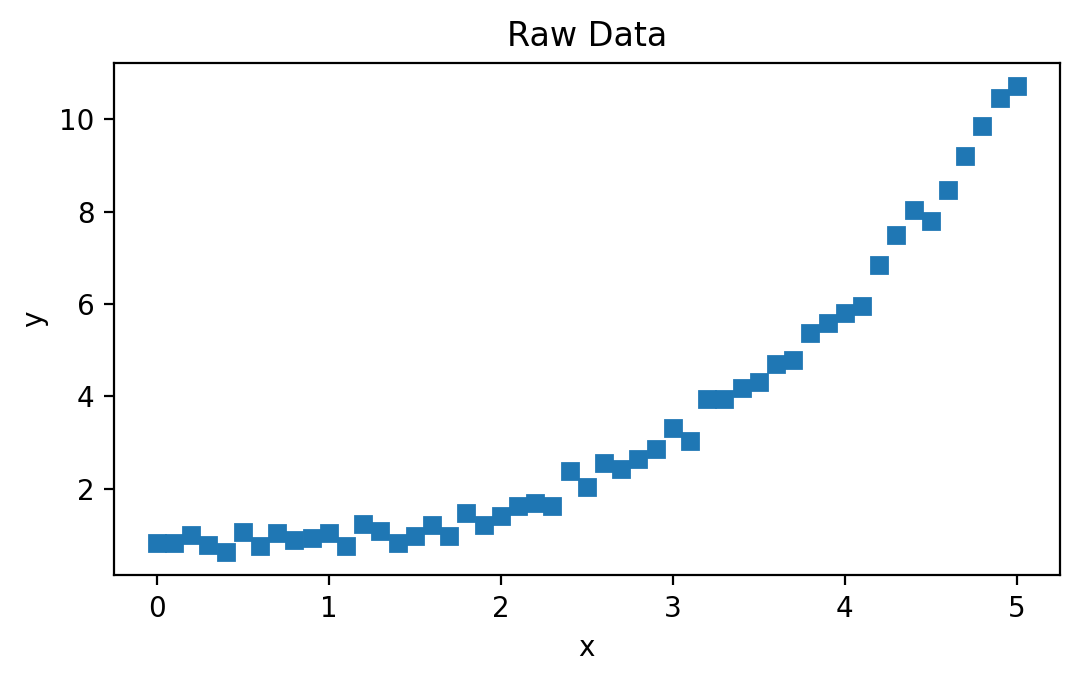

In [39]:
excel_file = 'data/demo-polynomial-2.xlsx'
mydata = pd.read_excel(excel_file)
x2 = np.array(mydata['x'])
y2 = np.array(mydata['y'])

fig, ax = plt.subplots()
ax.plot(x2, y2, 's')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Raw Data')

fig.tight_layout()
plt.show()

Having learned our lesson from last time, we see that this clearly isn't linear, so let's start with a quadratic this time.

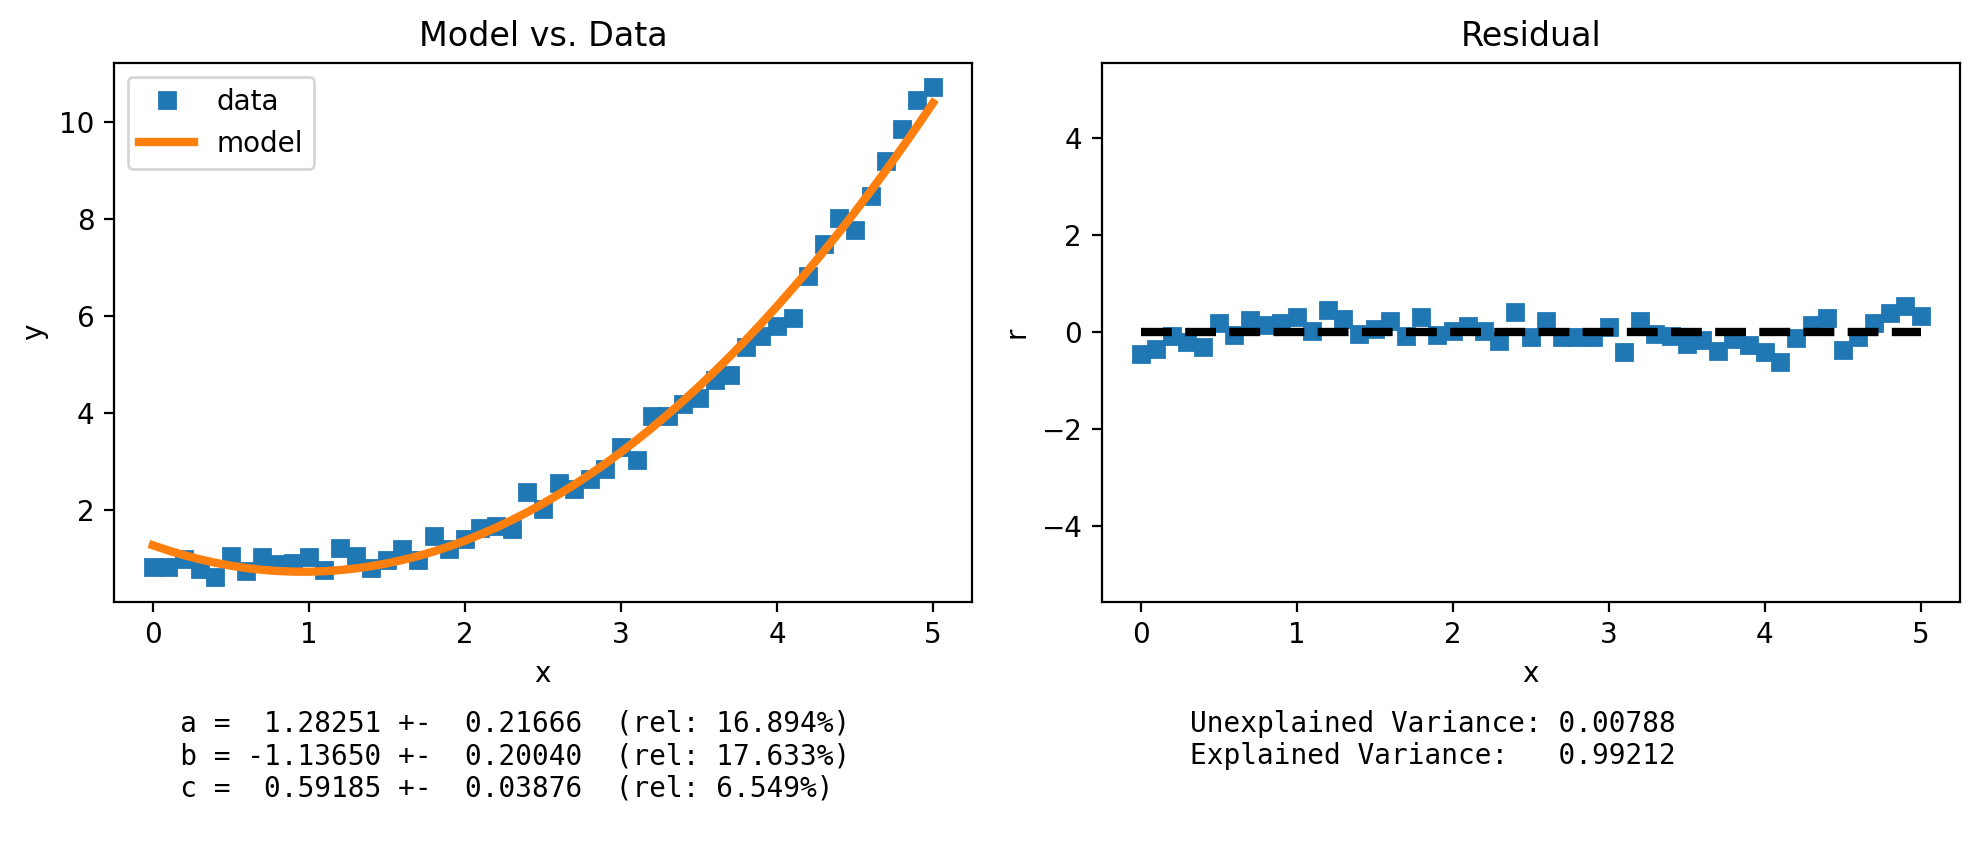

In [32]:
pfit, perr = classlib4334.fit_and_plot(p2, x2, y2, residual=True)

This looks pretty decent at first, with R-squared above 0.99, and most of the residual having a relative error under 10%.  This isn't terribe given the observable noise in the data.  However, I do see some coherence in the residual, and some notable deviations from the apparent trend in the data at low values of x.  So I'm going to try a cubic.

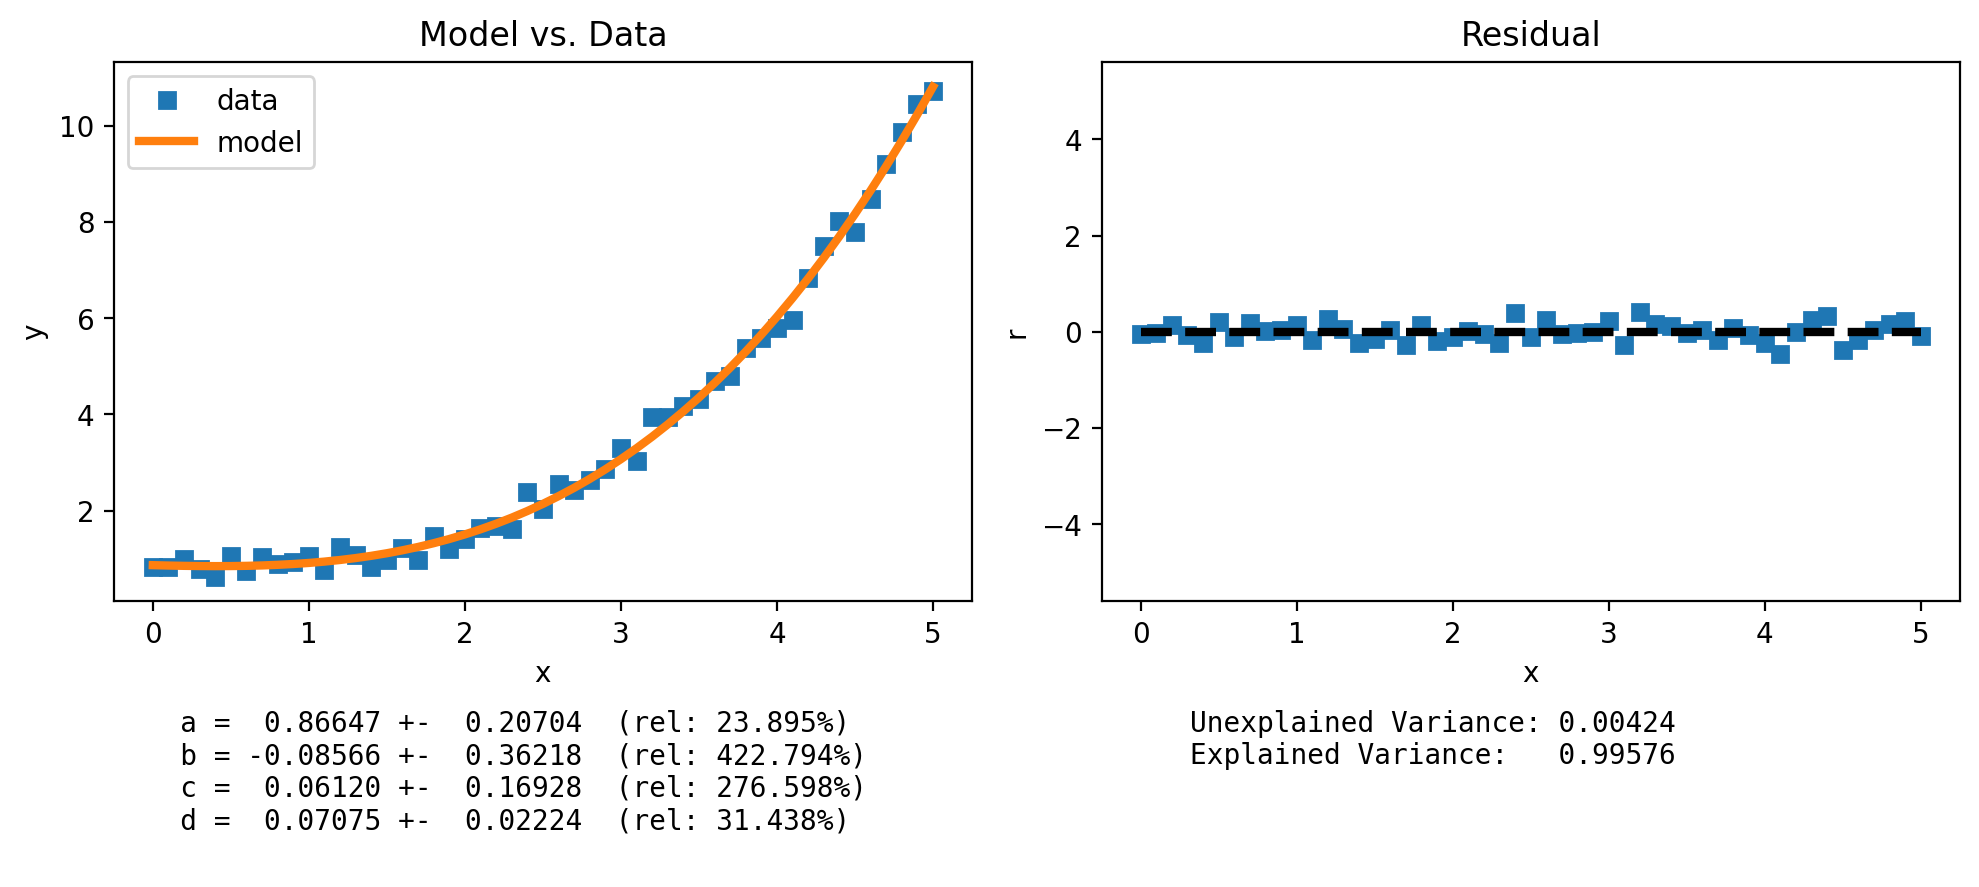

In [33]:
pfit, perr = classlib4334.fit_and_plot(p3, x2, y2, residual=True)

And this looks better!  Most elements of the relative residual are within about the 5% range, and I no longer see any low-frequency structure / coherence.  Following the reasoning in the first example, I would probably stop here and report my model, of the form
$$ y = A + Bx + Cx^2 + Dx^3$$
where
$$ A = 0.87 \pm 0.21 $$
$$ B = -0.086 \pm 0.36 $$
$$ C = 0.061 \pm 0.17 $$
$$ D = 0.071 \pm 0.022 $$
at the 95% confidence level.

## Going Further:  A preview

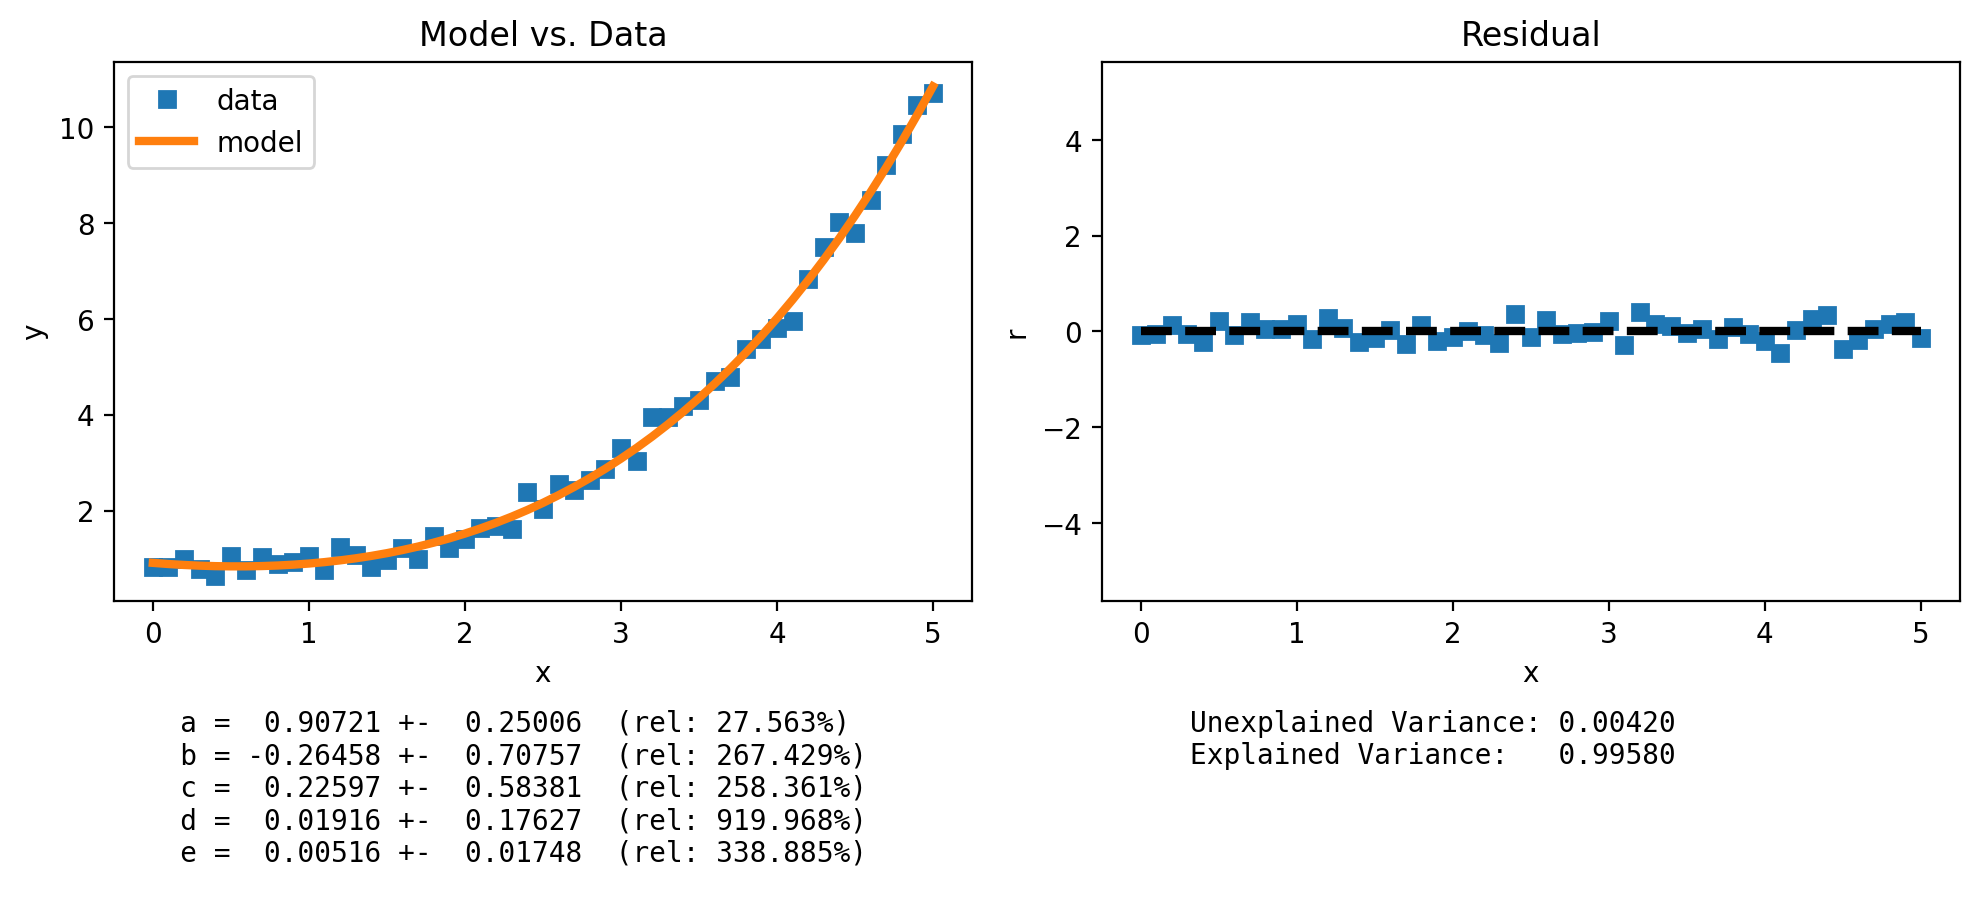

In [42]:
pfit2, perr2 = classlib4334.fit_and_plot(p4, x2, y2, residual=True)

Visually we now see no difference with the prior model, although the explained variance increased by a tiny amount (but this is to be expected, as R-squared should **always increase** whenever you add new terms to your model).  However, the cost of this "improvement" is that ***most of the parameters now include zero in their confidence intervals***.  Something is starting to go haywire ... and if we look very closely at the fitted curve, we see it starting to "wiggle" rather than curving smoothly through the data.  This is evidence that we may have transitioned into "chasing noise."

Based on these -- admittedly qualitative -- observations, I would stick with the cubic model.  However, before quitting entirely, I notice one aspect of the previous result might give us pause:  the uncertainty range for both $b$ *and* $c$ include zero.  It is possible, therefore, that one or both of these parameters are not even needed.  Let's see what happens if we remove the more uncertain of these, $b$.  To do so, we can't just use one of the "standard" polynomial functions defined about (called "full polynomials").  Instead, we must construct a custom version of the cubic polynomial that is missing the linear term (called a "reduced polynomial").  Then we can proceed as before.

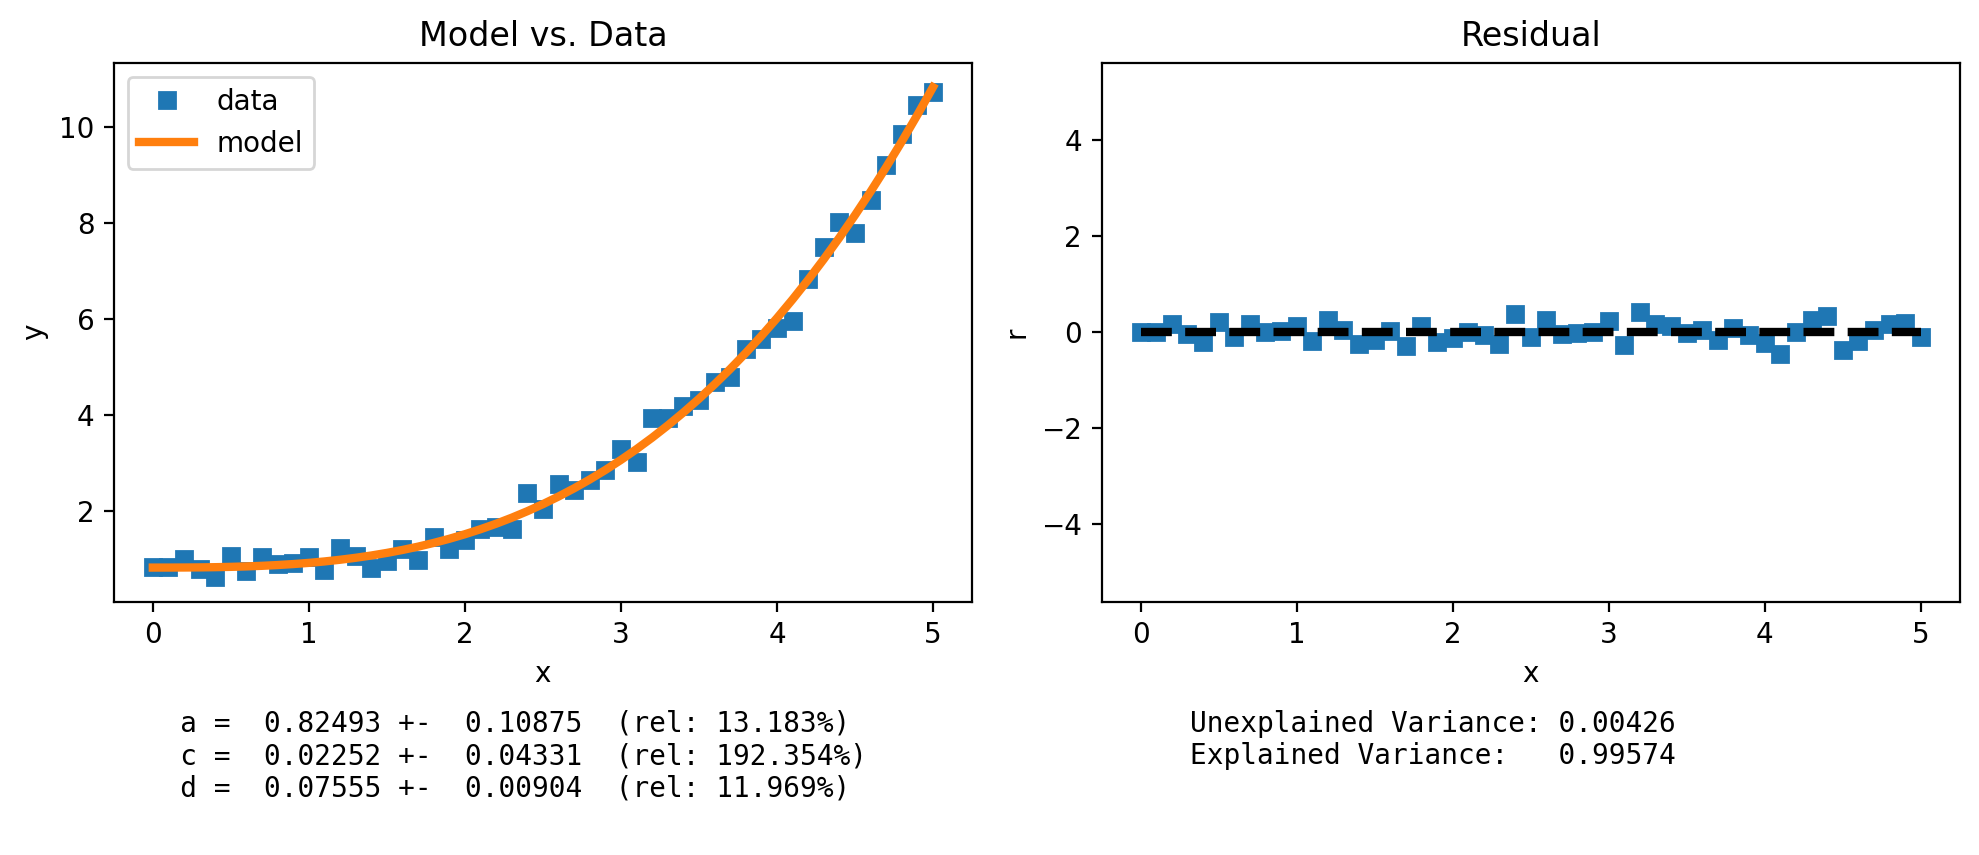

In [34]:
# construct a reduced cubic without the linear term
def p3nob(x, a, c, d):
    return a + c*x**2 + d*x**3

pfit2, perr2 = classlib4334.fit_and_plot(p3nob, x2, y2, residual=True)

Aha!  Our reduced cubic is nearly indistinguishable from the full cubic.  There is a tiny, tiny reduction in the explained variance, but in return for this negligible cost, we get two benefits:
* a simpler model, with only three terms instead of four
* a reduction in the uncertainties of the surviving terms
  
These "feel" like **very significant** benefits, and the cost "feels" small, so this reduce model "feels" like an improvement (we'll turn these feelings into quantitative comparisons next lecture).

However, despite the reduction in uncertainties of the surviving terms, the coefficent $c$ of the quadratic term still has a relative uncertainty of well over 100%.  Therefore, we now explore removing it as well.

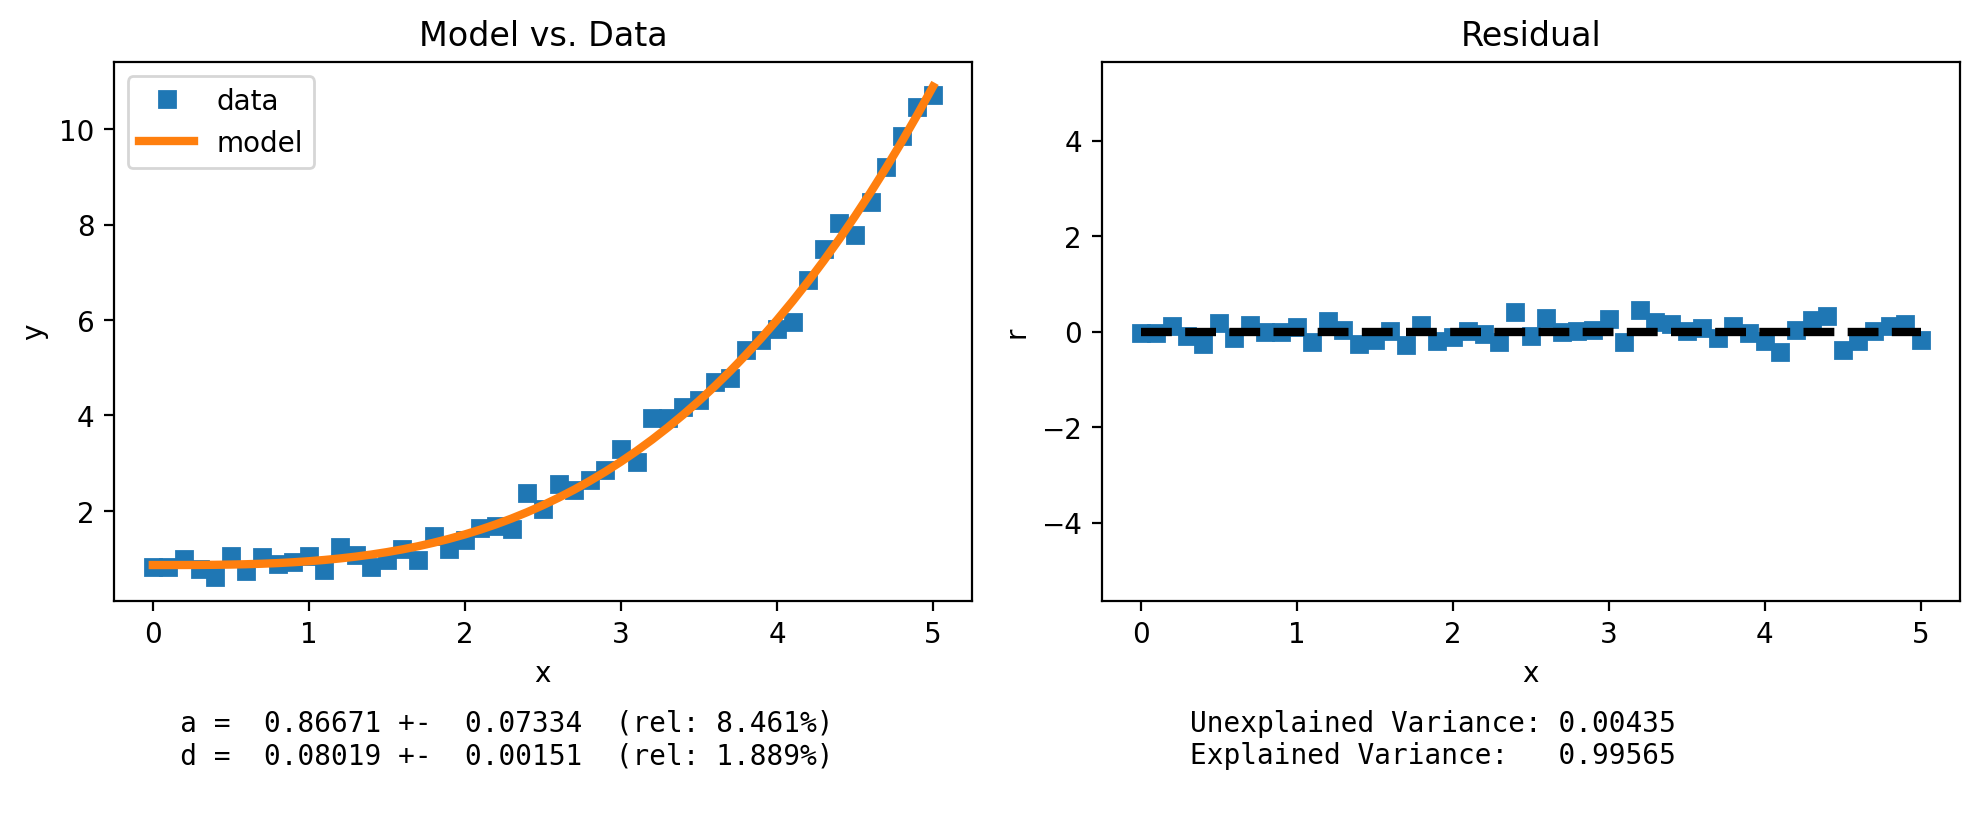

In [36]:
# reduced cubic missing linear and quadratic terms
def p3nobnoc(x, a, d):
    return a + d*x**3

pfit2, perr2 = classlib4334.fit_and_plot(p3nobnoc, x2, y2, residual=True)

Once again, we see essentially no change in the quality of the fit.  The explained variance decreased again very slightly, but
* we further reduced the number of terms in the model
* we firther reduced the uncertainties in the parameters

The uncertainty in the cubic term, in particular, is now less than 2%, which is really nice, because *most* of the variation in the data seems like it is attributable to the cubic term.  The constant term, while distinguishably nonzero, is a relatively small contributor.

Finally, let's explore what would have happened if, instead of stopping with a third-order polynomial, we had added yet another term of fourth order:

In the next lesson, we will begin to quantify the ideas that we have been exploring qualitatively here.

Notice how we've been writing the same code over and over in each cell?  Like, basically just copy and pasting lots of code?  Whenever you find yourself doing that, it is usually a good idea to ***write a function*** that does all of the things in the code.  It's nice to do this as generically as possible, so that the function you write can be used as often as possible.

I've provided a small function in a file called "**classlib4334.py**," that contains a few helpful functions of this type.  You can use it as follows.

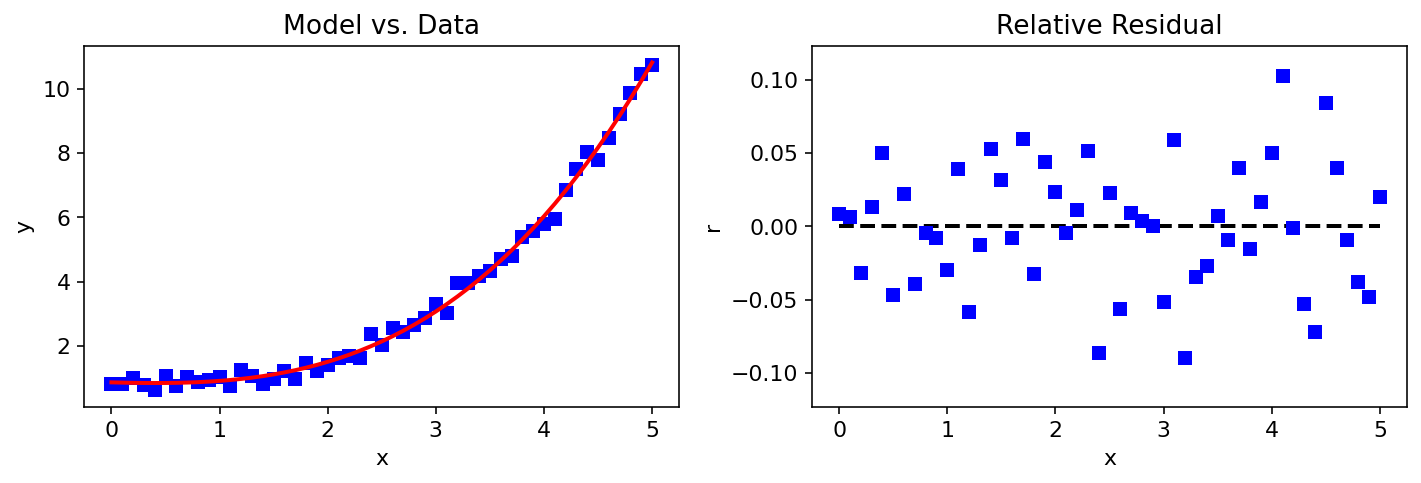

Parameter Values: 95%

   a =   0.866474 +- 0.207042
   b =  -0.085664 +- 0.362182
   c =   0.061200 +- 0.169279
   d =   0.070754 +- 0.022243

absolute r-squared: 0.99576493  (2.37 nines)
adjusted r-squared: 0.99549460  (2.35 nines)




In [9]:
import classlib4334

pfit, perr = classlib4334.fit_and_plot(p3, x2, y2)

See how much easier this is!  You can use it from now on.  Note:  we'll discuss the "Adjusted R-squared" in the next demonstration.